# 1. Step: Import of required libraries

In this step all the libraries needed within the script are imported

In [1]:
import sys
import xlrd, xlsxwriter
import numpy as np
import pandas as pd
import time
import datetime
import scipy.io
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Step: Locating the Database Address

The database address is defined in this step.

In [2]:
ProjectSpecs_Path_Main     = 'C:/Users/ghardadi/Documents/'
ProjectSpecs_Name_ConFile  = 'MRIO_Config.xlsx'
ProjectSpecs_DataPath1     = 'C:/Users/ghardadi/EXIOBASE_2/'
ProjectSpecs_PackagePath1  = 'C:/Users/ghardadi/'

sys.path.append(ProjectSpecs_PackagePath1)

# 3. Step: Extracting the Information from Config File

In this step we collect the information from config file and start the simulation.

In [3]:
# Load project-specific config file
Project_Configfile  = xlrd.open_workbook(ProjectSpecs_Path_Main + 'Calculation/' + ProjectSpecs_Name_ConFile)
Project_Configsheet = Project_Configfile.sheet_by_name('Config')

# Naming script and defining of name specifications (e.g. date when the script was used)
Name_Script        = Project_Configsheet.cell_value(6,3)
Name_Scenario      = Project_Configsheet.cell_value(5,3)
StartTime          = datetime.datetime.now()
TimeString         = str(StartTime.year) + '_' + str(StartTime.month) + '_' + str(StartTime.day) + '__' + str(StartTime.hour) + '_' + str(StartTime.minute) + '_' + str(StartTime.second)
DateString         = str(StartTime.year) + '_' + str(StartTime.month) + '_' + str(StartTime.day)
Path_Result        = ProjectSpecs_Path_Main + 'Results/'

# Importing information about Exiobase 2.2 from excel file
EB3_NoofCountries  = int(Project_Configsheet.cell_value(4,8))
EB3_NoofProducts   = int(Project_Configsheet.cell_value(5,8))
EB3_NoofIndustries = int(Project_Configsheet.cell_value(6,8))
EB3_NoofIOSectors  = int(Project_Configsheet.cell_value(7,8))
EB3_NoofFDCategories = int(Project_Configsheet.cell_value(8,8))

# Start the timer
Time_Start = time.time()
print('Start of simulation: ' + time.asctime() + '.')

Start of simulation: Thu Feb  6 09:08:19 2020.


# 4. Step: Import Exiobase 3.6

Now, Exiobase 3.6 will be imported. This includes the following:

L-Matrix containing the Leontief-Inverse

S-Matrix containing the emissions

Y-Matrix containing the final demands

FDE-Matrix containing the direct emissions caused by the final demands

In [4]:
print('Loading Exiobase 3.6 data.')

MRIO_Name = 'EXIOBASE3_13_Mon_49R_2018_06_01_ITCpxp.mat'

Filestring_Matlab_in = ProjectSpecs_DataPath1 + MRIO_Name

print('Import L-Matrix (Leontief-Inverse)')
MRIO_L = scipy.io.loadmat(Filestring_Matlab_in)['EB3_L_ITC']

print('Import S-Matrix (Emissions).')
MRIO_S = scipy.io.loadmat(Filestring_Matlab_in)['EB3_S_ITC']

print('Import Y-Matrix (Final Demands)')
MRIO_Y = scipy.io.loadmat(Filestring_Matlab_in)['EB3_Y']

print('Import FDE-Matrix (Direct Emissions from Final Demand).')
MRIO_FDE = scipy.io.loadmat(Filestring_Matlab_in)['EB3_FinalDemand_Emissions']

print('Import the Names of Industry Sectors.')
MRIO_Prod = scipy.io.loadmat(Filestring_Matlab_in)['EB3_ProductNames200']

print('Import the Names of Extension Codes.')
MRIO_Ext = scipy.io.loadmat(Filestring_Matlab_in)['EB3_Extensions']

print('Import the Names of Regions.')
MRIO_Reg = scipy.io.loadmat(Filestring_Matlab_in)['EB3_RegionList']

Loading Exiobase 3.6 data.
Import L-Matrix (Leontief-Inverse)
Import S-Matrix (Emissions).
Import Y-Matrix (Final Demands)
Import FDE-Matrix (Direct Emissions from Final Demand).
Import the Names of Industry Sectors.
Import the Names of Extension Codes.
Import the Names of Regions.


### Obtain the A matrix

Rather than obtaining the A matrix from the initial notes, the A matrix is rebuilt by inverting the L matrix.

OR extract the data again from the EXIOBASE .txt files.

$$A = I - L^{-1}$$

In [5]:
I = np.identity(9800)

print('Invert the L-Matrix to obtain A-Matrix.')
MRIO_A = I - np.linalg.inv(MRIO_L)

Invert the L-Matrix to obtain A-Matrix.


In [6]:
pd.DataFrame(MRIO_A)

,0,1,2,3,4,5,6,7,8,9,...,9790,9791,9792,9793,9794,9795,9796,9797,9798,9799
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.0,2.954280e-02,-2.155945e-21,3.480463e-21,2.374595e-21,-3.652071e-22,2.720175e-22,1.184176e-02,4.942397e-03,2.124917e-03,...,2.723578e-21,1.129119e-22,9.164760e-22,-3.404822e-22,-1.847296e-22,3.848901e-22,-2.046207e-22,9.293152e-22,9.295004e-22,0.0
2,0.0,-3.624630e-22,1.329597e-02,4.075745e-21,3.503341e-21,1.458173e-21,6.701181e-22,7.567535e-03,2.604747e-02,1.211434e-02,...,1.359549e-21,4.879373e-22,9.777289e-22,3.908845e-23,1.646440e-22,1.729979e-21,-2.413321e-22,-1.043265e-21,-4.790800e-22,0.0
3,0.0,4.276684e-21,3.001277e-21,9.946211e-02,4.275286e-21,1.308257e-21,8.622944e-22,-1.270658e-20,2.940280e-04,5.938046e-04,...,3.012887e-06,3.070624e-06,2.909184e-06,3.642668e-07,9.697503e-07,3.221183e-07,2.822474e-07,7.411621e-07,2.441954e-07,0.0
4,0.0,-8.154940e-22,-4.646069e-22,-2.241365e-22,4.063304e-03,2.827456e-22,1.101118e-21,-1.503281e-21,-4.474528e-19,6.145585e-20,...,4.144627e-07,3.552802e-07,4.074917e-07,8.255272e-09,4.325394e-08,5.738994e-08,4.359604e-08,1.097772e-07,6.215330e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,0.0,1.106767e-06,5.491405e-07,1.750842e-07,1.551313e-06,2.880372e-06,-5.577995e-22,7.561790e-07,5.487078e-07,4.003863e-07,...,5.543322e-09,6.709177e-09,5.464220e-09,6.007841e-09,6.917347e-09,2.737560e-04,1.144997e-07,1.343025e-09,1.636750e-04,0.0
9796,0.0,6.921606e-10,3.922469e-10,1.662140e-10,8.226086e-10,1.558137e-09,-1.521579e-20,1.136344e-09,4.853207e-10,3.421881e-10,...,2.546414e-06,1.013752e-06,2.810747e-06,9.918023e-07,1.214890e-06,8.881953e-03,5.333215e-02,3.128852e-03,7.059842e-07,0.0
9797,0.0,2.623750e-09,2.310495e-09,5.498402e-10,3.005735e-09,4.729805e-09,-4.550693e-21,4.917943e-09,1.890400e-09,1.210459e-09,...,1.077360e-05,7.522742e-06,1.409948e-05,1.242548e-05,1.234137e-05,5.676139e-03,3.316637e-03,1.103311e-02,1.192537e-06,0.0
9798,0.0,-8.584383e-22,4.929034e-22,-1.172144e-23,-3.892082e-22,-9.973137e-23,6.207183e-22,2.722707e-22,7.548008e-22,6.721744e-22,...,1.412820e-10,1.096360e-10,1.555286e-10,1.562255e-10,1.560832e-10,2.518156e-09,5.528798e-10,8.155402e-10,2.181727e-08,0.0


### Importing the Aggregation Matrix

While aggregation is not necessary for this study, the product and region names are collected for identifiers in this study.

In [7]:
print('Import Excel file containing aggregation table.')
# Excel file created by Gilang Hardadi based on the excel file named
# EB340_Aggregation.xlsx
AggregationFile  = xlrd.open_workbook(ProjectSpecs_DataPath1 + 'EB340_Aggregation.xlsx')

# 1) Product aggregation
ProductSheet = AggregationFile.sheet_by_name('Products')
PI = [] # Names of categories
Pv = [] # List of aggregation indices
Pa = [] # Names of aggregated categories
for m in range(0,200):
    PI.append(ProductSheet.cell_value(m+1,0))
for m in range(0,200):
    Pv.append(int(ProductSheet.cell_value(m+1,1)))
for m in range(0,12):
    Pa.append(ProductSheet.cell_value(m+1,3))

# 2) Region aggregation
RegionSheet = AggregationFile.sheet_by_name('Regions')
RI = [] # Names of regions
Rv = [] # List of aggregation indices
Ra = [] # Names of aggregated categories
for m in range(0,49):
    RI.append(RegionSheet.cell_value(m+1,0))
for m in range(0,49):
    Rv.append(int(RegionSheet.cell_value(m+1,1)))
for m in range(0,6):
    Ra.append(RegionSheet.cell_value(m+1,3))

Import Excel file containing aggregation table.


# 5. Step: Import characterisation factors

In order to calculate the environmental footprints, characterisation factors are needed
to convert the emissions received by S. L. Y to midpoint indicators

In [8]:
print('Import characterisation factors to calculate midpoint indicators.')

ImpactFile  = xlrd.open_workbook(ProjectSpecs_DataPath1 + 'Characterization_EB36.xlsx')
ImpactSheet = ImpactFile.sheet_by_name('Emissions')
ImpactCategory_Names = []
for m in range(0,36):
    ImpactCategory_Names.append(ImpactSheet.cell_value(0,m+1))
    
MRIO_Char = np.zeros((36,1707))
for m in range(0,36):
    for n in range(0,1707):
        MRIO_Char[m,n] = ImpactSheet.cell_value(n+1,m+1)

Import characterisation factors to calculate midpoint indicators.


# 6. Step: Selecting the final demand vectors

The Y vector is selected based on the environmental footprints that is going to be assessed. The demand emissions are also added in the footprint calculation. The environmental footprint assessed in this study is Carbon Footprint of German households.

In [9]:
print('Import characterisation factors to calculate midpoint indicators.')

FD_DE_HH = MRIO_Y[:,EB3_NoofFDCategories*5]
DE_DE_HH = MRIO_FDE[:,EB3_NoofFDCategories*5]

Import characterisation factors to calculate midpoint indicators.


# 7. Step: Calculating the emissions inventory and footprint

The inventories enlist the emissions embodied in the household consumption for each emissions type.
The footprint will show the total GHG emissions, measured in CO<sub>2</sub> equivalent.

In [10]:
EmbEm_DE_HH = MRIO_Char[4,:].dot(MRIO_S).dot(MRIO_L).dot(FD_DE_HH)/1e9

print(round(EmbEm_DE_HH,2), "billion kg CO2e")

#Total National Indirect Embodied Emissions

555.42 billion kg CO2e


In [14]:
print(round(EmbEm_DE_HH/80645605*1e9,2), "kg CO2e per capita")

#Does not calculate the direct emissions coming from FDE Matrix

6887.14 kg CO2e per capita


# 8. Step: Conducting Structural Path Analysis

In Structural Path Analysis, embodied emissions are analysed for each step of the supply chain, and the direct emissions for each final demand are excluded.

The emissions for each step is interpreted as follows:
+ Step 0 identifies the direct emissions of the first-tier industry that produce the final demand. (e.g. direct emissions of the electricity industry to satisfy the household electricity demand.)
+ Step 1 identifies the total emissions that come from the second-tier industry needed by the first-tier industry to produce the selected final demand. (e.g. emissions to produce the electricity needed by the food industry to satisfy the household food demand.)
+ Step n identifies the total emissions that come from the nth-tier industry needed by the the n-1th-tier industry... to produce the selected final demand.

In this exercise, we will assess the emissions embodied in each stage of supply chain to satisfy the German household final demand, and then we compare the result with step 7.

In [18]:
Path_DE_HH = np.zeros(10)
Cumul_Path = np.zeros(10)

#Path Tier-0
PTemp_DE_HH = MRIO_Char[4,:].dot(MRIO_S)
Path_DE_HH[0] = PTemp_DE_HH.dot(FD_DE_HH)/1e9
Cumul_Path[0] = Path_DE_HH[0]
print("Path Tier 0 : ", round(Path_DE_HH[0],2), "billion CO2e")

#Path Tier 1-9
for i in range(1,10):
    PTemp_DE_HH = PTemp_DE_HH.dot(MRIO_A)
    Path_DE_HH[i] = PTemp_DE_HH.dot(FD_DE_HH)/1e9
    Cumul_Path[i] = Cumul_Path[i-1] + Path_DE_HH[i]
    print("Path Tier", i, ": ", round(Path_DE_HH[i],2), "billion CO2e")

Path Tier 0 :  201.28 billion CO2e
Path Tier 1 :  168.24 billion CO2e
Path Tier 2 :  86.68 billion CO2e
Path Tier 3 :  45.32 billion CO2e
Path Tier 4 :  24.41 billion CO2e
Path Tier 5 :  13.29 billion CO2e
Path Tier 6 :  7.27 billion CO2e
Path Tier 7 :  3.99 billion CO2e
Path Tier 8 :  2.2 billion CO2e
Path Tier 9 :  1.21 billion CO2e


### Visualizing the emissions in each stage of supply chain

(0, 600)

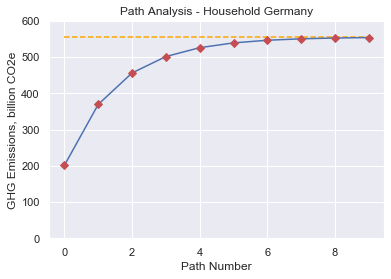

In [19]:
plt.plot(range(0,10), Cumul_Path) #Blue Line
plt.plot(range(0,10), Cumul_Path, 'rD') #Red Dots
plt.xlabel("Path Number")
plt.ylabel("GHG Emissions, billion CO2e")
plt.title("Path Analysis - Household Germany")
plt.hlines(y=EmbEm_DE_HH, xmin=0, xmax=9, color='orange', linestyles = ['--']) #Total Embodied Emissions from L Matrix

plt.ylim((0,600))

### Obtaining the household emissions coming from the 0th step of the supply chain

In [26]:
Path0_DE_HH = MRIO_Char[4,:].dot(MRIO_S).dot(np.diag(FD_DE_HH)/1e9)

In [27]:
Index_Path0 = pd.MultiIndex.from_product([RI,PI], names=('Region', 'Sector'))

EmbEm_Path0 = pd.DataFrame(Path0_DE_HH, index=Index_Path0, columns=['GHG Emissions, billion CO2e'])

EmbEm_Path0.sort_values(by=['GHG Emissions, billion kg CO2e'], ascending=False)[0:50]

GHG Emissions, billion CO2e
Region               Sector                                                                         
Germany              Electricity by coal                                                   37.383692
                     Steam and hot water supply services                                   14.272612
                     Distribution services of gaseous fuels through ...                    13.976987
                     Air transport services                                                12.916122
                     Motor Gasoline                                                         9.970320
                     Real estate services                                                   9.402688
United States        Air transport services                                                 6.559366
Germany              Collected and purified water, distribution serv...                     3.779863
                     Food waste for treatment: composting and land a...                     3.364325
                     Gas/Diesel Oil                                                         3.200421
                     Food products nec                                                      2.892664
                     Other waste for treatment: waste water treatment                       2.514800
                     Other services                                                         2.424335
                     Transmission services of electricity                                   1.807188
                     Food waste for treatment: waste water treatment                        1.772382
                     Recreational, cultural and sporting services                           1.698662
                     Other business services                                                1.602395
China                Chemicals nec                                                          1.521661
Germany              Electricity by gas                                                     1.370717
                     Hotel and restaurant services                                          1.357515
                     Chemicals nec                                                          1.234902
RoW Middle East      Textiles                                                               1.220890
Germany              Furniture; other manufactured goods n.e.c.                             1.132976
                     Intert/metal waste for treatment: incineration                         1.113488
RoW Asia and Pacific Air transport services                                                 1.109477
Germany              Crops nec                                                              1.092608
                     Sea and coastal water transportation services                          1.076165
                     Printed matter and recorded media                                      1.072587
RoW Middle East      Wearing apparel; furs                                                  1.039451
Germany              Construction work                                                      0.980385
                     Other non-metallic mineral products                                    0.932001
                     Wheat                                                                  0.909157
RoW Asia and Pacific Crops nec                                                              0.899088
Germany              Distribution and trade services of electricity                         0.896233
                     Electricity by biomass and waste                                       0.886553
                     Dairy products                                                         0.862544
RoW Middle East      Chemicals nec                                                          0.839477
United States        Chemicals nec                                                          0.830245
RoW Asia and Pacific Chemicals ne

In [28]:
writer = pd.ExcelWriter(Path_Result + 'Path_Analysis1.xlsx', engine='xlsxwriter')

Path0 = EmbEm_Path0.sort_values(by=['GHG Emissions, billion CO2e'], ascending=False)

Path0.to_excel(writer, sheet_name='Path0')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Obtaining the household emissions coming from the 1th step of the supply chain

In [29]:
Path1_DE_HH = np.diag(MRIO_Char[4,:].dot(MRIO_S)).dot(MRIO_A).dot(np.diag(FD_DE_HH)/1e9)

In [30]:
Index_Path1 = pd.MultiIndex.from_product([RI,PI,RI,PI], names=('Region 1', 'Sector 1', 'Region 0', 'Sector 0'))

EmbEm_Path1 = pd.DataFrame(Path1_DE_HH.reshape(9800*9800,1), index=Index_Path1, columns=['GHG Emissions, billion kg CO2e'])

EmbEm_Path1.sort_values(by=['GHG Emissions, billion kg CO2e'], ascending=False)[0:50]

GHG Emissions, billion kg CO2e
Region 1             Sector 1                                           Region 0      Sector 0                                                                          
Germany              Electricity by coal                                Germany       Distribution and trade services of electricity                            5.189180
                     Raw milk                                           Germany       Dairy products                                                            5.028692
India                Cattle                                             India         Leather and leather products                                              4.204580
Germany              Cattle                                             Germany       Food products nec                                                         2.970457
                     Construction work                                  Germany       Real estate services                                                      2.684562
Russia               Crude petroleum and services related to crude o... Germany       Motor Gasoline                                                            2.618033
Germany              Raw milk                                           Germany       Food products nec                                                         2.294978
                     Electricity by coal                                Germany       Food products nec                                                         1.687200
                                                                                      Motor Gasoline                                                            1.669165
                                                                                      Motor vehicles, trailers and semi-trailers                                1.483980
                     Cattle                                             Germany       Products of meat cattle                                                   1.444209
                     Electricity by coal                                Germany       Furniture; other manufactured goods n.e.c.                                1.376411
RoW Africa           Crude petroleum and services related to crude o... Germany       Motor Gasoline                                                            1.368530
RoW America          Cattle                                             RoW America   Products of meat cattle                                                   1.287430
Germany              Electricity by coal                                Germany       Real estate services                                                      1.280186
                     Steam and hot water supply services                Germany       Distribution and trade services of electricity                            1.219706
                     Electricity by coal                                Germany       Dairy products                                                            1.032254
                     Other business services                            Germany       Real estate services                                                      1.030734
                     Electricity by coal                                Germany       Transmission services of electricity                                      1.008840
                                                                                      Hotel and restaurant services                                             0.974643
RoW Asia and Pacific Crude petroleum and services related to crude o... Germany       Motor Gasoline                                                            0.897580
Germany              Electricity by coal                                Germany       Health and social work services                                           0.866725
United Kingdom       Crude petroleum and services related to crude o... Germany   

### Saving the Path Analysis Results

In [32]:
writer = pd.ExcelWriter(Path_Result + 'Path_Analysis.xlsx', engine='xlsxwriter')

Path0 = EmbEm_Path0.sort_values(by=['GHG Emissions, billion CO2e'], ascending=False)[0:200]
Path1 = EmbEm_Path1.sort_values(by=['GHG Emissions, billion kg CO2e'], ascending=False)[0:200]

Path0.to_excel(writer, sheet_name='Path0')
Path1.to_excel(writer, sheet_name='Path1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [38]:
Path0_FR_HH = MRIO_Char[4,:].dot(MRIO_S).dot(np.diag(MRIO_Y[:,42*7])/1e9)

Index_Path0 = pd.MultiIndex.from_product([RI,PI], names=('Region', 'Sector'))

EmbEm_Path0 = pd.DataFrame(Path0_FR_HH, index=Index_Path0, columns=['GHG Emissions, billion kg CO2e'])

EmbEm_Path0.sort_values(by=['GHG Emissions, billion kg CO2e'], ascending=False)[0:50]

GHG Emissions, billion kg CO2e
Region               Sector                                                                            
Indonesia            Electricity by coal                                                      81.192917
                     Electricity by gas                                                       28.286022
                     Electricity by petroleum and other oil derivatives                       24.104407
                     Post and telecommunication services                                      10.832372
                     Wearing apparel; furs                                                     4.550001
                     Inland water transportation services                                      3.704091
                     Vegetables, fruit, nuts                                                   3.439127
                     Wood and products of wood and cork (except furn...                        3.177623
                     Motor Gasoline                                                            2.522585
                     Chemicals nec                                                             2.207093
                     Hotel and restaurant services                                             2.172164
                     Air transport services                                                    2.061764
                     Poultry                                                                   1.825945
                     Rubber and plastic products                                               1.656865
                     Raw milk                                                                  1.402704
                     Transmission services of electricity                                      1.333708
                     Cereal grains nec                                                         1.199422
                     Distribution and trade services of electricity                            1.036639
RoW Asia and Pacific Other non-metallic mineral products                                       1.036093
Indonesia            Printed matter and recorded media                                         0.970953
                     Sea and coastal water transportation services                             0.969632
                     Financial intermediation services, except insur...                        0.679032
                     Other land transportation services                                        0.655094
                     Railway transportation services                                           0.647187
                     Tobacco products                                                          0.631457
                     Products of forestry, logging and related services                        0.552875
                     Beverages                                                                 0.520838
                     Kerosene                                                                  0.519767
                     Food products nec                                                         0.514782
RoW Asia and Pacific Motor Gasoline                                                            0.493053
Indonesia            Insurance and pension funding services, except ...                        0.483693
                     Leather and leather products                                              0.458714
                     Fish products                                                             0.414659
                     Furniture; other manufactured goods n.e.c.                                0.398283
RoW Middle East      Chemicals nec                                                             0.395883
Indonesia            Textiles                                                                  0.393629
RoW Asia and Pacific Tobacco products                                                          0.366510
                 

### Obtaining the household emissions coming from the 2nd step of the supply chain

As the calculation for the higher steps is getting more complex, unnecessary memory is removed and the algorithm is modified to save only emissions higher than 0.1 billion CO<sub>2</sub>e for each step in the n-th tier of the supply chain.

In [39]:
del MRIO_L

del Index_Path0
del Index_Path1

del Path0_DE_HH
del Path1_DE_HH

del EmbEm_Path0
del EmbEm_Path1

del Path0
del Path1

In [47]:
Path2_DE_HH = np.zeros((50,4))
Index_Path2 = np.zeros((4))
Path2_Value = 0

for k in range(1127,1141): # During the lecture, change into electricity industry
    # Create the A1 Matrix, by eliminating all values for other columns
    MRIO_A1 = np.zeros((9800,9800))
    MRIO_A1[:,k] = MRIO_A[:,k].copy()
    # Create the A2 Matrix, by eliminating all values for other rows
    MRIO_A2 = np.zeros((9800,9800))
    MRIO_A2[k,:] = MRIO_A[k,:].copy()
    A = MRIO_Char[4,:].dot(MRIO_S).dot(MRIO_A1).dot(MRIO_A2).dot(FD_DE_HH)/1e9
    Path2_Value = Path2_Value + A.sum(axis=0)
    print(k)
    if A >= 0.5: # Should we do further calculation for the specific industry?
        # Rate-Determining Step
        A = np.diag(MRIO_Char[4,:].dot(MRIO_S)).dot(MRIO_A1).dot(MRIO_A2).dot(np.diag(FD_DE_HH)/1e9)
        a = len((A[A >= 0.1]).flatten())
        for i in range(0,a):
            Index_Path2[0] = int(np.where(A >= 0.1)[0][i])
            Index_Path2[1] = k
            Index_Path2[2] = int(np.where(A >= 0.1)[1][i])
            Index_Path2[3] = A[int(np.where(A >= 0.1)[0][i]),int(np.where(A >= 0.1)[1][i])]
            if Index_Path2[3] > Path2_DE_HH[49,3]:
                Path2_DE_HH[49,:] = Index_Path2.copy()
                Path2_DE_HH = Path2_DE_HH[Path2_DE_HH[:,3].argsort()[::-1]]
                
print(round(Path2_Value,2), "billion CO2e")

1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
5.44 billion CO2e


In [48]:
EmbEm_Path2 = pd.DataFrame({'Region 2': [RI[j] for j in [int(i) for i in Path2_DE_HH[:,0] // 200]],
                            'Sector 2': [PI[j] for j in [int(i) for i in Path2_DE_HH[:,0] % 200]],
                            'Region 1': [RI[j] for j in [int(i) for i in Path2_DE_HH[:,1] // 200]],
                            'Sector 1': [PI[j] for j in [int(i) for i in Path2_DE_HH[:,1] % 200]],
                            'Region 0': [RI[j] for j in [int(i) for i in Path2_DE_HH[:,2] // 200]],
                            'Sector 0': [PI[j] for j in [int(i) for i in Path2_DE_HH[:,2] % 200]],
                            'GHG Emissions, billion CO2e': Path2_DE_HH[:,3]})

EmbEm_Path2.sort_values(by=['GHG Emissions, billion CO2e'], ascending=False)[0:10]

,Region 2,Sector 2,Region 1,Sector 1,Region 0,Sector 0,"GHG Emissions, billion CO2e"
0,Germany,Electricity by coal,Germany,Distribution and trade services of electricity,Germany,Distribution and trade services of electricity,0.788217
1,Germany,Steam and hot water supply services,Germany,Distribution and trade services of electricity,Germany,Distribution and trade services of electricity,0.185269
2,Germany,Electricity by coal,Germany,Distribution and trade services of electricity,Germany,Transmission services of electricity,0.153181
3,Germany,Electricity by coal,Germany,Transmission services of electricity,Germany,Distribution and trade services of electricity,0.152267
4,Germany,Electricity by coal,Germany,Distribution and trade services of electricity,Germany,Hotel and restaurant services,0.136538
5,Germany,Electricity by coal,Germany,Distribution and trade services of electricity,Germany,Real estate services,0.134471
6,Germany,Electricity by coal,Germany,Distribution and trade services of electricity,Germany,Health and social work services,0.123410
38,Austria,Paddy rice,Austria,Paddy rice,Austria,Paddy rice,0.000000
30,Austria,Paddy rice,Austria,Paddy rice,Austria,Paddy rice,0.000000
31,Austria,Paddy rice,Austria,Paddy rice,Austria,Paddy rice,0.000000


In [56]:
EmbEm_Path2 = pd.DataFrame({'Region 2': [RI[j] for j in [int(i) for i in Path2_DE_HH[:,0] // 200]],
                            'Sector 2': [PI[j] for j in [int(i) for i in Path2_DE_HH[:,0] % 200]],
                            'Region 1': [RI[j] for j in [int(i) for i in Path2_DE_HH[:,1] // 200]],
                            'Sector 1': [PI[j] for j in [int(i) for i in Path2_DE_HH[:,1] % 200]],
                            'Region 0': [RI[j] for j in [int(i) for i in Path2_DE_HH[:,2] // 200]],
                            'Sector 0': [PI[j] for j in [int(i) for i in Path2_DE_HH[:,2] % 200]],
                            'GHG Emissions, billion CO2e': Path2_DE_HH[:,3]})

EmbEm_Path2.sort_values(by=['GHG Emissions, billion CO2e'], ascending=False)[0:40]

,Region 2,Sector 2,Region 1,Sector 1,Region 0,Sector 0,"GHG Emissions, billion CO2e"
0,Germany,"Cement, lime and plaster",Germany,Construction work,Germany,Real estate services,0.937622
1,Germany,Electricity by coal,Germany,Distribution and trade services of electricity,Germany,Distribution and trade services of electricity,0.788217
2,India,Cattle,India,Leather and leather products,India,Leather and leather products,0.718476
3,RoW America,Cattle,RoW America,Cattle,RoW America,Products of meat cattle,0.593555
4,Germany,Raw milk,Germany,Dairy products,Germany,Dairy products,0.556887
5,Russia,Transportation services via pipelines,Russia,Crude petroleum and services related to crude ...,Germany,Motor Gasoline,0.297009
6,Germany,Raw milk,Germany,Dairy products,Germany,Hotel and restaurant services,0.268706
7,China,Electricity by coal,China,Textiles,China,Wearing apparel; furs,0.268644
8,Germany,Electricity by coal,Germany,Construction work,Germany,Real estate services,0.261070
9,Russia,Transportation services via pipelines,Germany,Transportation services via pipelines,Germany,Motor Gasoline,0.217736


### Saving the Path Analysis Results

In [22]:
writer = pd.ExcelWriter(Path_Result + 'Path2_Analysis.xlsx', engine='xlsxwriter')

Path2 = EmbEm_Path2.sort_values(by=['GHG Emissions, billion CO2e'], ascending=False)[0:100]

Path2.to_excel(writer, sheet_name='Path2')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

86.68 billion CO2e


In [16]:
print('Script is finished. Terminating logging process and closing all log files.')
Time_End = time.time()
Time_Duration = Time_End - Time_Start

print('End of simulation: ' + time.asctime() + '.')
print('Duration of simulation: %.1f seconds.' % Time_Duration)

Script is finished. Terminating logging process and closing all log files.
End of simulation: Wed Jan 29 11:54:24 2020.
Duration of simulation: 417.6 seconds.
